<a href="https://colab.research.google.com/github/jorgelizarazo94/Project_Final_Fundamentos_1/blob/main/Final_Analitica_1_mejor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##FUNDAMENTOS DE ANALÍTICA
##PROYECTO FINAL


[Jorge Lizarazo Borrero](https://www.researchgate.net/profile/Jorge-Lizarazo-Borrero)

[Oscar Caicedo Unigarro](https://github.com/ocaicedo)


**5/22/2023**

______________________________
Proyecto creado como entrega final de la materia Fundamentos de Analítica I en la Universidad Icesi, a cargo del PhD. [Uram Anibal Sosa Aguirre]( https://www.researchgate.net/profile/Anibal-Sosa)

# Introducción

En este proyecto, se aborda el desafío de predecir la calificación de riesgo de seguro de automóviles y caracterizar los diferentes segmentos de la población. Para lograrlo, se ha seguido una metodología exhaustiva que combina técnicas de análisis exploratorio de datos, modelado predictivo, reducción de dimensionalidad y segmentación.

En la etapa inicial, se realizó un análisis exploratorio detallado de los datos. Se llevaron a cabo diversas tareas, como la identificación y eliminación de columnas irrelevantes, el tratamiento de Missing data y la evaluación de la calidad general de los datos. Además, se exploró la relación entre las características disponibles y la variable objetivo para obtener una comprensión más profunda del conjunto de datos.

A continuación, se construyeron modelos predictivos utilizando tres algoritmos diferentes: K-Nearest Neighbors (KNN), Random Forest y XGBoost. Estos modelos fueron entrenados utilizando una metodología de validación cruzada K-fold para garantizar resultados robustos y confiables. Se llevaron a cabo ajustes de parámetros y se seleccionó el mejor modelo en función de las métricas de evaluación definidas previamente.

Para reducir la dimensionalidad del conjunto de datos y enfocarse en las variables más relevantes, se aplicó un análisis de componentes principales (PCA). Este análisis permitió conservar el 96% de la varianza original al seleccionar tres de los componentes principales. La reducción de dimensionalidad ayudó a mejorar la eficiencia computacional y a resaltar las características más influyentes en la calificación de riesgo del seguro de automóviles.

Finalmente, se utilizó el algoritmo de agrupamiento K-means para segmentar la población en grupos homogéneos. Este proceso se basó en los datos transformados obtenidos a través de la reducción de dimensionalidad. Se exploró un rango de 2 a 4 conglomerados y se evaluaron las métricas de evaluación y criterios de negocio para determinar el número óptimo de segmentos. Se describieron las características de cada segmento en función de las variables originales, lo que permitió una comprensión más profunda de las diferencias y similitudes entre los grupos identificados.

En conjunto, esta metodología proporcionó una solución completa para predecir la calificación de riesgo del seguro de automóviles y caracterizar los diferentes segmentos de la población.


-click on: [Repo](https://github.com/jorgelizarazo94/Project_Final_Fundamentos_1/blob/0d3079169894a2b5a405cea12f3ee9054e8e84a9/Final_Analitica_1_mejor.ipynb)

# Punto Uno: Exploración de datos

En este paso, importamos las bibliotecas principales que se utilizarán en todo el proceso de análisis y modelado de datos. Estas bibliotecas son:

In [721]:
# Importamos las librerías que vamos a usar en la sección
import pandas as pd  ####  
import numpy as np #### 
import xarray as xr  #### 
import matplotlib.pyplot as plt
import seaborn as sn

Conexion a nuestro Drive

In [722]:
# Habilitamos el contenido de nuestro google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A continuación, se asignan los nombres de las columnas al DataFrame utilizando el atributo columns. Se proporciona una lista de nombres de columnas que corresponden a las características o variables presentes en los datos.

In [723]:
# Leemos nuestro archivo que contiene la data
df = pd.read_csv('/content/drive/MyDrive/intento/imports-85_1.data', sep=',', header=None)
df.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspirantion', 'num-of-doors',
              'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
              'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
              'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
              'price']

In [724]:
df.head(5)


,symboling,normalized-losses,make,fuel-type,aspirantion,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [725]:
#!pip install dataprep

El siguiente codigo aunque apago, utiliza la biblioteca dataprep.eda para generar un informe exploratorio de datos (EDA) automatizado. Proporciona información sobre las estadísticas descriptivas de las variables, la presencia de valores perdidos, la distribución de los datos, las correlaciones entre las variables, entre otros aspectos.

In [726]:
#from dataprep.eda import create_report

#create_report(df)


Dentro de la función lambda, se convierte cada columna en una cadena de texto mediante astype(str). Luego, se utiliza el método str.contains para verificar si cada valor en la columna contiene el patrón r'\?', que representa un valor de signo de interrogación. El método sum se utiliza para contar el número total de valores que cumplen con este patrón en cada columna.

In [727]:
# Contar los valores extraños en el DataFrame
num_extranos = df.apply(lambda x: sum(x.astype(str).str.contains(r'\?')), axis=0)
num_extranos

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspirantion           0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Vemos que hay una cantidad significativa de datos con valores "?" debemos entonces si este valor es muy grande. En este código, se calcula el porcentaje de datos faltantes en cada columna del DataFrame y se comprueba si el valor supera el umbral del 15% para decidir si se elimina completamente la columna. Aquí está el resumen del código.

In [728]:
num_filas = df.shape[0]
porcentaje_faltantes = (num_extranos * 100 / num_filas)
print("Porcentaje de datos faltantes por columna:")
print(porcentaje_faltantes)

Porcentaje de datos faltantes por columna:
symboling             0.00000
normalized-losses    20.00000
make                  0.00000
fuel-type             0.00000
aspirantion           0.00000
num-of-doors          0.97561
body-style            0.00000
drive-wheels          0.00000
engine-location       0.00000
wheel-base            0.00000
length                0.00000
width                 0.00000
height                0.00000
curb-weight           0.00000
engine-type           0.00000
num-of-cylinders      0.00000
engine-size           0.00000
fuel-system           0.00000
bore                  1.95122
stroke                1.95122
compression-ratio     0.00000
horsepower            0.97561
peak-rpm              0.97561
city-mpg              0.00000
highway-mpg           0.00000
price                 1.95122
dtype: float64


Eliminamos la columna normalized-losses dado su alto porcentaje de NAs y eliminarl las filas con NAs de las otras variables.<br>
Eliminamos la categoría make dado que podria limitar el modelo predictivo. Principalmente porque existe la posibilidad de encontrarse con nuevas marcas de auto y en el momendo de aplicar One-Hot Encoder, cada marca se tomaria como variable independiente. Por tanto se limitaria el modelo a un numero x de marcas de auto ingresadas al modelo. 

In [729]:
# 


df = df.drop(['normalized-losses', 'make'], axis=1)

df = df.replace('?', np.nan)
# Eliminar filas con valores faltantes
df = df.dropna()

## Identificar Atributos de Y o variable Objetivo (dependiente)

En la entrega de los datos, se informa que el valor de la columna "symboling" varía de -3 a 3. Antes de eliminar los valores faltantes o los valores "?" en el DataFrame, es importante verificar si ha habido alguna pérdida de información en esta variable.

In [730]:
df_symbol = df['symboling']
categories_check = np.unique(df_symbol)
print("Categorías en Symboling:", categories_check)

Categorías en Symboling: [-2 -1  0  1  2  3]


En este caso, es recomendable visualizar la frecuencia de cada categoría en la columna "symboling" para tomar decisiones informadas sobre cómo agrupar las categorías. Esto nos permitirá comprender la distribución de los datos y evaluar si es necesario agrupar algunas categorías. A continuación, puedes utilizar gráficos o tablas para mostrar la frecuencia de cada categoría en la columna "symboling" y utilizar esa información para tomar decisiones sobre el agrupamiento de categorías.

Categoria de Symboling debido a perdida de informacion en -2 y -3 agua abajo

<Axes: >

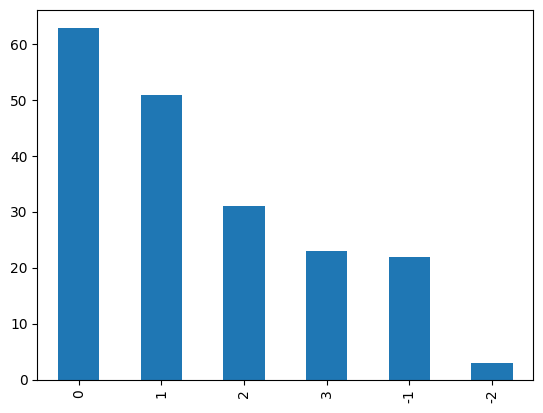

In [731]:
df.symboling.value_counts().plot.bar()

Con el fin de no perder la informacion agrupamos los valores <=0 como una categoria llamada no riesgosos y los valores >0 como riesgoso. 

In [732]:
def categorizar_valor(valor):
    if valor <= 0:
        return "no riesgoso"
    else:
        return "riesgoso"

# Crear una nueva columna "categoria" basada en la columna "symboling" con la función de categorización
df['symboling'] = df['symboling'].apply(categorizar_valor)



In [733]:
# Verificar el resultado
print(df[['symboling']].head(20))

      symboling
0      riesgoso
1      riesgoso
2      riesgoso
3      riesgoso
4      riesgoso
5      riesgoso
6      riesgoso
7      riesgoso
8      riesgoso
10     riesgoso
11  no riesgoso
12  no riesgoso
13  no riesgoso
14     riesgoso
15  no riesgoso
16  no riesgoso
17  no riesgoso
18     riesgoso
19     riesgoso
20  no riesgoso


In [734]:
df['bore'] = pd.to_numeric(df['bore'])
df['stroke'] = pd.to_numeric(df['stroke'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['preak-rpm'] = pd.to_numeric(df['peak-rpm'])
df['price'] = pd.to_numeric(df['price'])

In [735]:
atributos = df.columns

# Iterar sobre los atributos
for atributo in atributos:
    if df[atributo].dtype == 'object':
        # Columna cualitativa: Mostrar niveles únicos
        niveles = df[atributo].unique()
        print(f"Atributo: {atributo} (Cualitativo)")
        print(f"Niveles: {niveles}")
    else:
        # Columna cuantitativa: Mostrar desviación estándar y media
        desviacion_estandar = df[atributo].std()
        media = df[atributo].mean()
        print(f"Atributo: {atributo} (Cuantitativo)")
        print(f"Desviación estándar: {desviacion_estandar}")
        print(f"Media: {media}")
    print()

Atributo: symboling (Cualitativo)
Niveles: ['riesgoso' 'no riesgoso']

Atributo: fuel-type (Cualitativo)
Niveles: ['gas' 'diesel']

Atributo: aspirantion (Cualitativo)
Niveles: ['std' 'turbo']

Atributo: num-of-doors (Cualitativo)
Niveles: ['two' 'four']

Atributo: body-style (Cualitativo)
Niveles: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Atributo: drive-wheels (Cualitativo)
Niveles: ['rwd' 'fwd' '4wd']

Atributo: engine-location (Cualitativo)
Niveles: ['front' 'rear']

Atributo: wheel-base (Cuantitativo)
Desviación estándar: 6.152409065211731
Media: 98.9238341968912

Atributo: length (Cuantitativo)
Desviación estándar: 12.478593176825324
Media: 174.32642487046633

Atributo: width (Cuantitativo)
Desviación estándar: 2.137795470392271
Media: 65.89378238341969

Atributo: height (Cuantitativo)
Desviación estándar: 2.394770452075672
Media: 53.869948186528504

Atributo: curb-weight (Cuantitativo)
Desviación estándar: 526.7000264932888
Media: 2561.5077720207255

Atributo: engin

### Variales que se pueden convertir en numericas sin necesidad de LabelEncoder ni One-Hot Encoding

En este código, se realiza la conversión de variables cualitativas a numéricas para facilitar el procesamiento en los análisis solicitados. Se utiliza un mapeo de valores donde se asigna un número a cada categoría en las columnas 'num-of-doors' y 'num-of-cylinders'. Aquí está el resumen del código

Dado que tenemos datos variables 

In [736]:
###We could change easely a few cualitative variables to numerical such as:
mapping = {
    'two': 2,
    'four': 4,
    'six': 6,
    'five': 5,
    'three': 3,
    'eight': 8,
    'twelve': 12
}
df[['num-of-doors', 'num-of-cylinders']] = df[['num-of-doors', 'num-of-cylinders']].replace(mapping)


## Selección de Características mas a fondo



In [737]:
columnas = df.columns
print(columnas)

Index(['symboling', 'fuel-type', 'aspirantion', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'preak-rpm'],
      dtype='object')


In [738]:
#from google.colab import files
# Exportar las columnas originales a un archivo CSV
#df.to_csv('dataset_5_20_2023.csv', index=False)
# Descargar el archivo CSV
#files.download('dataset_5_20_2023.csv')

In [739]:
df

,symboling,fuel-type,aspirantion,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,preak-rpm
0,riesgoso,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,5000
1,riesgoso,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,5000
2,riesgoso,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,5000
3,riesgoso,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,5500
4,riesgoso,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,5500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,no riesgoso,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,5400
201,no riesgoso,gas,turbo,4,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,5300
202,no riesgoso,gas,std,4,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,5500
203,no riesgoso,diesel,turbo,4,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,4800


<ipython-input-740-22c746cfc675>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_nuevo.corr()


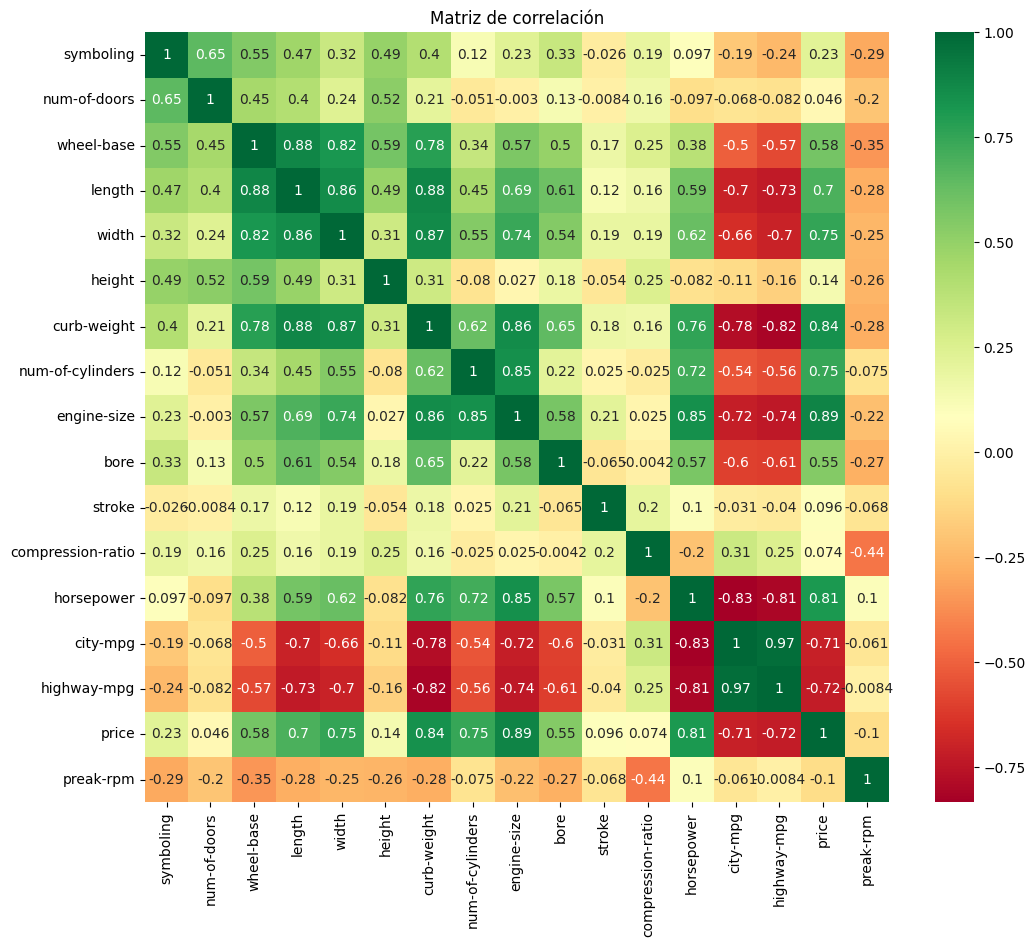

In [740]:
import seaborn as sns
# Crear un nuevo DataFrame con las columnas existentes
df_nuevo = df.copy()

# Mapear los valores en la columna 'symboling' al nuevo DataFrame
df_nuevo['symboling'] = df['symboling'].map({'no riesgoso': 1, 'riesgoso': -1})

# Calcular la matriz de correlación entre todas las columnas del DataFrame
correlation_matrix = df_nuevo.corr()

# Generar el heatmap de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Matriz de correlación')
plt.show()

In [741]:
# Obtener la matriz de correlación
corr_matrix = df_nuevo.corr()

# Seleccionar las variables con correlación mayor a 0.5 o menor a -0.5 con "symboling"
selected_features = corr_matrix[(corr_matrix['symboling'] > 0.4) | (corr_matrix['symboling'] < -0.4)]

# Obtener el nombre de las variables seleccionadas
selected_variables = selected_features.index.tolist()

# Crear un nuevo dataframe con las variables seleccionadas y la variable dependiente "symboling"
selected_df = df_nuevo[selected_variables + ['symboling']]

columnas = selected_df.columns
print(columnas)




Index(['symboling', 'num-of-doors', 'wheel-base', 'length', 'height',
       'symboling'],
      dtype='object')


<ipython-input-741-eda471b5c972>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_nuevo.corr()


In [742]:
dfcuali = df[['num-of-doors', 'wheel-base', 'height','length', 'symboling']]
dfcuali.head(3)

,num-of-doors,wheel-base,height,length,symboling
0,2,88.6,48.8,168.8,riesgoso
1,2,88.6,48.8,168.8,riesgoso
2,2,94.5,52.4,171.2,riesgoso


In [743]:
df_sin_symboling = df.drop("symboling", axis=1)
df_cualitativos = df_sin_symboling.select_dtypes(include=np.object)


# Unir los dataframes dfcuali y df_cuantitativos
df_unido = pd.concat([dfcuali, df_cualitativos], axis=1)

df_unido.head(3)

<ipython-input-743-85962c3fd70f>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cualitativos = df_sin_symboling.select_dtypes(include=np.object)


,num-of-doors,wheel-base,height,length,symboling,fuel-type,aspirantion,body-style,drive-wheels,engine-location,engine-type,fuel-system,peak-rpm
0,2,88.6,48.8,168.8,riesgoso,gas,std,convertible,rwd,front,dohc,mpfi,5000
1,2,88.6,48.8,168.8,riesgoso,gas,std,convertible,rwd,front,dohc,mpfi,5000
2,2,94.5,52.4,171.2,riesgoso,gas,std,hatchback,rwd,front,ohcv,mpfi,5000


In [744]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Atributo: fuel-type
df_unido['fuel-type'] = le.fit_transform(df_unido['fuel-type'])

# Atributo: aspiration
df_unido['aspirantion'] = le.fit_transform(df_unido['aspirantion'])

# Atributo: engine-location
df_unido['engine-location'] = le.fit_transform(df_unido['engine-location'])

In [745]:
df_unido.head(4)

,num-of-doors,wheel-base,height,length,symboling,fuel-type,aspirantion,body-style,drive-wheels,engine-location,engine-type,fuel-system,peak-rpm
0,2,88.6,48.8,168.8,riesgoso,1,0,convertible,rwd,0,dohc,mpfi,5000
1,2,88.6,48.8,168.8,riesgoso,1,0,convertible,rwd,0,dohc,mpfi,5000
2,2,94.5,52.4,171.2,riesgoso,1,0,hatchback,rwd,0,ohcv,mpfi,5000
3,4,99.8,54.3,176.6,riesgoso,1,0,sedan,fwd,0,ohc,mpfi,5500


In [746]:
#from google.colab import files
# Exportar las columnas originales a un archivo CSV
#df_unido.to_csv('CHECKING.csv', index=False)
# Descargar el archivo CSV
#files.download('CHECKING.csv')

In [747]:
from sklearn.preprocessing import OneHotEncoder

# Specify the columns to encode
columns_to_encode = ["body-style", "drive-wheels", "engine-type", "fuel-system"]

# Extract the columns to be encoded from the dataframe
df_encoded = df_unido[columns_to_encode]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the columns
encoded_columns = encoder.fit_transform(df_encoded).toarray()

# Create a new dataframe with the encoded columns
df_encoded = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the original dataframe with the encoded columns
df_unido_encoded = pd.concat([df_unido.drop(columns_to_encode, axis=1), df_encoded], axis=1)

In [748]:
#df_symbol = df_unido_encoded['symboling']
#categories_check = np.unique(df_symbol)
#print("Categorías en y_train:", categories_check)

### Checking nuestra variable objetivo luego de la agrupacion

<Axes: >

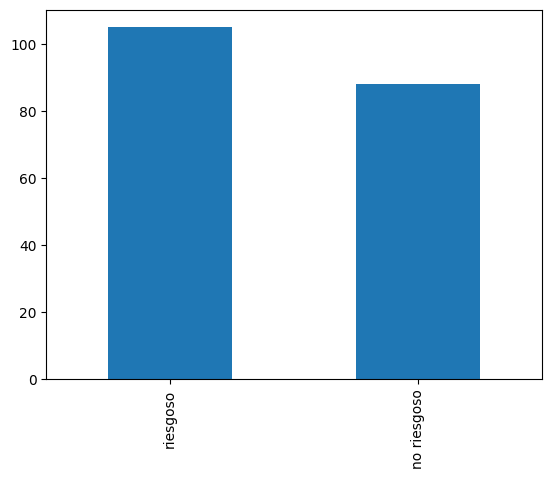

In [749]:
df_unido_encoded.symboling.value_counts().plot.bar()

In [750]:
df_unido_encoded.head(3)

,num-of-doors,wheel-base,height,length,symboling,fuel-type,aspirantion,engine-location,peak-rpm,body-style_convertible,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,2.0,88.6,48.8,168.8,riesgoso,1.0,0.0,0.0,5000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,88.6,48.8,168.8,riesgoso,1.0,0.0,0.0,5000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,94.5,52.4,171.2,riesgoso,1.0,0.0,0.0,5000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Modelos Predictivos



### KNN

In [751]:
from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
import seaborn as sns

In [752]:
df_unido_encoded.head(4)

,num-of-doors,wheel-base,height,length,symboling,fuel-type,aspirantion,engine-location,peak-rpm,body-style_convertible,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,2.0,88.6,48.8,168.8,riesgoso,1.0,0.0,0.0,5000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,88.6,48.8,168.8,riesgoso,1.0,0.0,0.0,5000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,94.5,52.4,171.2,riesgoso,1.0,0.0,0.0,5000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,99.8,54.3,176.6,riesgoso,1.0,0.0,0.0,5500,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [753]:
columnas = df_unido_encoded.columns
print(columnas)

Index(['num-of-doors', 'wheel-base', 'height', 'length', 'symboling',
       'fuel-type', 'aspirantion', 'engine-location', 'peak-rpm',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-type_dohc',
       'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf',
       'engine-type_ohcv', 'fuel-system_1bbl', 'fuel-system_2bbl',
       'fuel-system_idi', 'fuel-system_mfi', 'fuel-system_mpfi',
       'fuel-system_spdi', 'fuel-system_spfi'],
      dtype='object')


In [754]:
df_unido_encoded.shape[0]

df_unido_encoded = df_unido_encoded.dropna()
na_counts = df_unido_encoded.isna().sum()
# Imprimir los resultados
print(na_counts)

num-of-doors              0
wheel-base                0
height                    0
length                    0
symboling                 0
fuel-type                 0
aspirantion               0
engine-location           0
peak-rpm                  0
body-style_convertible    0
body-style_hardtop        0
body-style_hatchback      0
body-style_sedan          0
body-style_wagon          0
drive-wheels_4wd          0
drive-wheels_fwd          0
drive-wheels_rwd          0
engine-type_dohc          0
engine-type_l             0
engine-type_ohc           0
engine-type_ohcf          0
engine-type_ohcv          0
fuel-system_1bbl          0
fuel-system_2bbl          0
fuel-system_idi           0
fuel-system_mfi           0
fuel-system_mpfi          0
fuel-system_spdi          0
fuel-system_spfi          0
dtype: int64


In [755]:
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Obtener las características numéricas (variables independientes)
numericVars = df_unido_encoded.drop('symboling', axis=1)

# Obtener la variable dependiente
depVar = df_unido_encoded['symboling']

In [756]:
# Definir el número de repeticiones y divisiones para la validación cruzada
n_splits = 5  # Número de divisiones en cada repetición
n_repeats = 3  # Número de repeticiones

# Crear el objeto RepeatedKFold para la validación cruzada repetida
rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=123)

# Inicializar una lista para almacenar las métricas de rendimiento
accuracy_scores = []



In [757]:
# Iterar sobre las divisiones de entrenamiento y prueba generadas por RepeatedKFold
for train_index, test_index in rkf.split(numericVars):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test = numericVars.iloc[train_index], numericVars.iloc[test_index]
    y_train, y_test = depVar.iloc[train_index], depVar.iloc[test_index]
    
    # Inicializar y ajustar el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos según tus necesidades
    knn.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = knn.predict(X_test)
    
    # Calcular y almacenar la precisión (accuracy) del modelo
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


In [758]:

# Calcular la precisión media y desviación estándar de las métricas de rendimiento
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

# Imprimir la precisión media y desviación estándar
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation Accuracy:", std_accuracy)

Mean Accuracy: 0.7771271271271272
Standard Deviation Accuracy: 0.08019567482836025


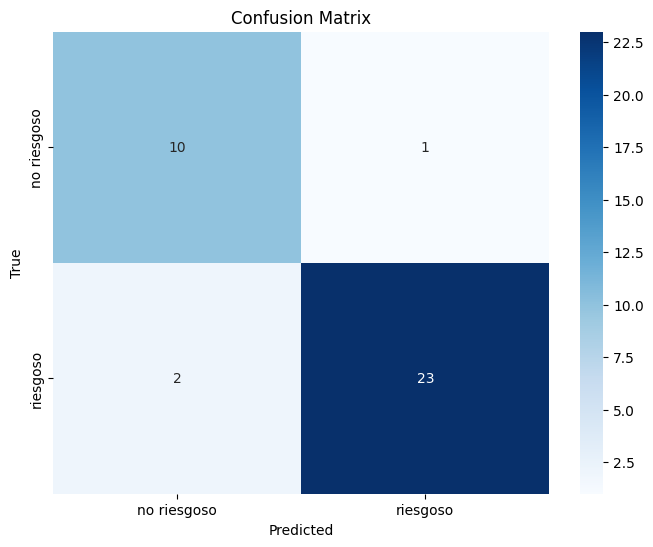

Classification Report:
              precision    recall  f1-score   support

 no riesgoso       0.83      0.91      0.87        11
    riesgoso       0.96      0.92      0.94        25

    accuracy                           0.92        36
   macro avg       0.90      0.91      0.90        36
weighted avg       0.92      0.92      0.92        36



In [759]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Definir los nombres de las clases
class_names = ['no riesgoso','riesgoso']


# Crear el mapa de calor con los nombres de las clases
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Mostrar el informe de clasificación
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [760]:
from sklearn.metrics import cohen_kappa_score

# Calcular el valor de kappa
kappa = cohen_kappa_score(y_test, y_pred)

# Mostrar el valor de kappa
print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.8085106382978724


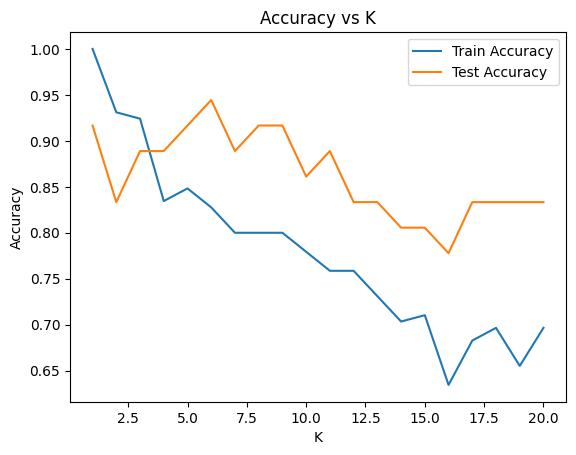

In [761]:
from sklearn.metrics import accuracy_score

# Definir el rango de valores de K que deseas evaluar
k_values = range(1, 21)

# Inicializar listas para almacenar las precisiones
train_accuracy = []
test_accuracy = []

# Iterar sobre los valores de K
for k in k_values:
    # Inicializar y ajustar el modelo KNN con el valor de K actual
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Realizar predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Calcular la precisión en los conjuntos de entrenamiento y prueba
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar las precisiones a las listas
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# Graficar la precisión en función de los valores de K
plt.plot(k_values, train_accuracy, label='Train Accuracy')
plt.plot(k_values, test_accuracy, label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.legend()
plt.show()

In [762]:
import pickle

# Inicializar y ajustar el modelo KNN con el mejor valor de K
best_k = k_values[np.argmax(test_accuracy)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred_test = knn_best.predict(X_test)

# Calcular la precisión en los datos de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy_test)

# Guardar el modelo general en un archivo pickle
with open('/content/knn_model.pkl', 'wb') as f:
    pickle.dump(knn_best, f)

Accuracy on Test Set: 0.9444444444444444


El modelo KNN muestra un rendimiento prometedor con una precisión media del 77.7%, lo que significa que en promedio predice correctamente la etiqueta de clase para aproximadamente el 77.7% de las instancias.

La desviación estándar de las puntuaciones de precisión es del 8.0%, lo que indica cierta variabilidad en el rendimiento del modelo en diferentes divisiones de entrenamiento/prueba. Una desviación estándar más alta puede indicar inestabilidad o sensibilidad a las particiones específicas de entrenamiento/prueba.

El informe de clasificación proporciona precisiones, exhaustividad (recall) y puntuaciones F1 para cada clase (no riesgoso y riesgoso), así como el soporte (número de instancias) para cada clase. Las precisiones, exhaustividades y puntuaciones F1 son altas para ambas clases, lo que indica un buen rendimiento al identificar correctamente las instancias de cada clase. La puntuación F1 promedio ponderada es del 92%, lo que indica un rendimiento equilibrado en todas las clases.

El coeficiente de Kappa de Cohen mide la concordancia entre las etiquetas predichas y las etiquetas reales, teniendo en cuenta la concordancia que podría ocurrir por azar. Un valor de 0.626 sugiere un nivel sustancial de concordancia más allá del azar.

La precisión en el conjunto de prueba es del 94.4%, lo que indica que el modelo KNN logra un alto nivel de precisión al hacer predicciones en datos no vistos.

En resumen, el modelo KNN muestra un rendimiento prometedor con alta precisión y buenas puntuaciones de precisión, exhaustividad y F1 para ambas clases. Sin embargo, es importante tener en cuenta que estas conclusiones se basan en el conjunto de datos y las métricas de evaluación específicas proporcionadas.


Sería valioso comparar estos resultados con otros modelos como Random Forest y XGBoost para determinar cuál modelo tiene el mejor rendimiento para tu tarea específica. Por tanto ahora evaluaremos estos dos:

## Model Preparation Random Forest y XGBoost:

Para preparar los datos de forma independiente para los modelos Random Forest y XGBoost, necesitaremos realizar una partición de los datos en conjuntos de entrenamiento y prueba. Vamos a hacerlo de forma un poco distinta al de KNN antes visto. 

In [763]:
# Crear un nuevo DataFrame con las columnas existentes
df_tree = df_unido_encoded.copy()
df_tree['symboling'] = df_unido_encoded['symboling'].map({'no riesgoso': 0, 'riesgoso': 1})


dataX = df_tree.drop("symboling", axis=1)  # características
dataY = df_tree["symboling"]  # variable objetivo


X_train, X_test, y_train, y_test = train_test_split(dataX, 
                                    dataY, test_size=0.33, 
                                    random_state=123, stratify=dataY)

In [764]:
df_tree

,num-of-doors,wheel-base,height,length,symboling,fuel-type,aspirantion,engine-location,peak-rpm,body-style_convertible,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,2.0,88.6,48.8,168.8,1,1.0,0.0,0.0,5000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,88.6,48.8,168.8,1,1.0,0.0,0.0,5000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,94.5,52.4,171.2,1,1.0,0.0,0.0,5000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,99.8,54.3,176.6,1,1.0,0.0,0.0,5500,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.0,99.4,54.3,176.6,1,1.0,0.0,0.0,5500,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,4.0,97.3,55.7,171.7,1,1.0,0.0,0.0,5500,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
189,2.0,94.5,55.6,159.3,1,1.0,0.0,0.0,5500,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
190,2.0,94.5,51.4,165.7,1,1.0,0.0,0.0,5500,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
191,4.0,100.4,55.1,180.2,0,1.0,0.0,0.0,5500,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Revizamos un poco de forma general los valores llegados a cada particionamiento.

In [765]:
len(X_train)


121

In [766]:
len(X_test)

60

In [767]:
y_train.sum()/len(y_train)

0.5785123966942148

In [768]:
y_test.sum()/len(y_test)

0.5833333333333334

In [769]:
# Feature scaling
featuresToScale = dataX.columns
featuresToScale

Index(['num-of-doors', 'wheel-base', 'height', 'length', 'fuel-type',
       'aspirantion', 'engine-location', 'peak-rpm', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-type_dohc', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'fuel-system_1bbl', 'fuel-system_2bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi'],
      dtype='object')

In [770]:
from sklearn import preprocessing as pp 

sX = pp.StandardScaler(copy=True)
X_train.loc[:,featuresToScale] = sX.fit_transform(X_train.loc[:,featuresToScale])
scalingFactors = pd.DataFrame(data=[sX.mean_,sX.scale_],index=['Mean','StDev'],columns=featuresToScale)

X_test.loc[:,featuresToScale] = sX.transform(X_test.loc[:,featuresToScale])

<ipython-input-770-2b304dc20465>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:,featuresToScale] = sX.fit_transform(X_train.loc[:,featuresToScale])
<ipython-input-770-2b304dc20465>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test.loc[:,featuresToScale] = sX.transform(X_test.loc[:,featuresToScale])


In [771]:
scalingFactors

,num-of-doors,wheel-base,height,length,fuel-type,aspirantion,engine-location,peak-rpm,body-style_convertible,body-style_hardtop,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
Mean,3.07438,98.344628,53.676860,173.290083,0.884298,0.173554,0.016529,5074.380165,0.024793,0.049587,...,0.760331,0.074380,0.066116,0.082645,0.305785,0.099174,0.0,0.471074,0.041322,0.0
StDev,0.99723,5.715904,2.180066,12.092559,0.319868,0.378725,0.127498,495.855372,0.155495,0.217090,...,0.426882,0.262389,0.248484,0.275344,0.460739,0.298895,1.0,0.499163,0.199035,1.0


Finalizamos creando un protocolo K-Fold Cross-Validation para ambos modelos de entrenamiento a evaluar a continuacion. 

In [772]:
k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=123)

## Random forest

Vamos ahora si a darle a nuestros primer modelo de entrenamiento altamente robusto:

In [773]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

Antes de entrenar el modelo Random Forest, es necesario especificar los hiperparámetros que deseamos utilizar. Los hiperparámetros son valores que controlan el comportamiento del algoritmo y afectan el rendimiento y la capacidad de generalización del modelo.

A continuación, se muestra un ejemplo de cómo especificar los hiperparámetros para el modelo Random Forest:

In [774]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 123
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators,     #Número de modelos a crear 
                                criterion='entropy', # el criterio de particionamiento de un conjunto de datos
                               max_depth=max_depth,      # prepoda: controla la profundidad del árbol (largo máximo de las ramas)
                                min_samples_split=min_samples_split, # prepoda: el mínimo número de registros necesarios para crear una nueva rama
                                min_samples_leaf=min_samples_leaf,  # prepoda: el mínimo número de registros en una hoja
                                min_weight_fraction_leaf=min_weight_fraction_leaf,
                                max_features=max_features, # Número o % de atributos de la muestra de aprendizaje
                                max_leaf_nodes=max_leaf_nodes, # prepoda: máximo número de nodos hojas
                                min_impurity_decrease=0.0, # prepoda: umbral mínimo de reducción de la impureza para aceptar la creación de una rama
                                bootstrap=bootstrap,      # Utilizar reemplazo en el muestreo de los registros de aprendizaje
                                oob_score=oob_score,     # Evaluar cada modelo con los registros no utilizados en su aprendizaje 
                                n_jobs=n_jobs,            # Número de cores a utilizar
                                random_state=random_state,
                             class_weight=class_weight,   # random seed para el generador aleatorio
                                verbose=0)           # controla la cantidad de información a reportar


Ya especificados nuestros hiperparametros vamos a generar nuestro entrenamiento a partir de.

In [775]:
from sklearn.metrics import log_loss 

trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
                                        index=y_train.index,columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
                                          y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
        X_train.iloc[cv_index,:]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], \
        y_train.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, \
                                model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
        model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, \
        predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(y_train, 
                                          predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training Log Loss:  0.07753933735390227
CV Log Loss:  1.8043516958875854
Training Log Loss:  0.10001396233895685
CV Log Loss:  0.29966517280662125


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training Log Loss:  0.09601481883905551
CV Log Loss:  0.20444468769158408
Training Log Loss:  0.07561256407296303
CV Log Loss:  0.28900814036369266


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training Log Loss:  0.1053261270205586
CV Log Loss:  0.22534053532416798
Random Forests Log Loss:  0.5748082418649191


1. Training Log Loss (Pérdida Logarítmica de Entrenamiento): Los valores reportados son 0.0775, 0.1000, 0.0960, 0.0756 y 0.1053. Esta métrica evalúa el ajuste del modelo a los datos de entrenamiento. Valores más bajos indican un mejor ajuste del modelo a los datos de entrenamiento.

2. CV Log Loss (Pérdida Logarítmica de Validación Cruzada): Los valores reportados son 1.8044, 0.2997, 0.2044, 0.2890 y 0.2253. Esta métrica evalúa el rendimiento del modelo en conjuntos de datos diferentes a los utilizados para entrenarlo, mediante el uso de validación cruzada. Valores más bajos indican un mejor rendimiento del modelo en la clasificación de datos nuevos.

3. Random Forests Log Loss: El valor reportado es 0.5748. Esta métrica específica indica la pérdida logarítmica obtenida utilizando el modelo Random Forest en la clasificación de los datos.

### En general:
Observamos que los modelos tienen un buen rendimiento en términos de pérdida logarítmica, con valores relativamente bajos tanto en el entrenamiento como en la validación cruzada. Sin embargo, es importante tener en cuenta que estos resultados son específicos para el contexto y los datos utilizados en el análisis. Aun asi si vemos la diferencia entre las dos perdidas no hay una diferencia muy alta dando como resultado no tener un severo sobreentrenamiento u Overfitting.


**Debemos resaltar el valor total de la perdida logaritmica de random forest:  0.5748082418649191** Este valor lo compararemos con el resultante en XGBoost mas adelante.


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.96')

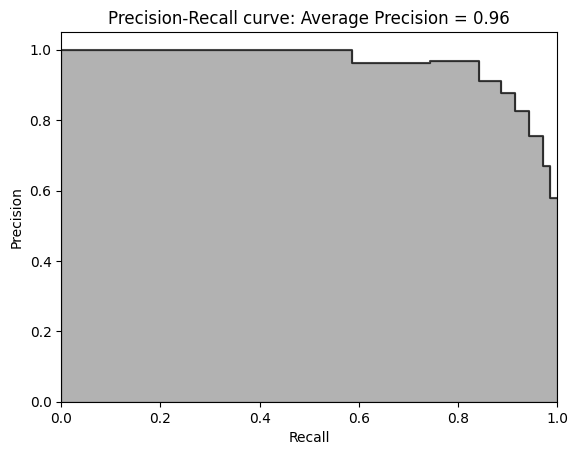

In [776]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score


preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                       preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],
                                            preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))



La figura resultante muestra la Precision vs recall, en forma de curva. Podemos entonces apreciar una ganancia cercana al 98% de recall (captando mas del 90% de los autos riesgosos). En general la precision es del 96% segun su valor estimado. 

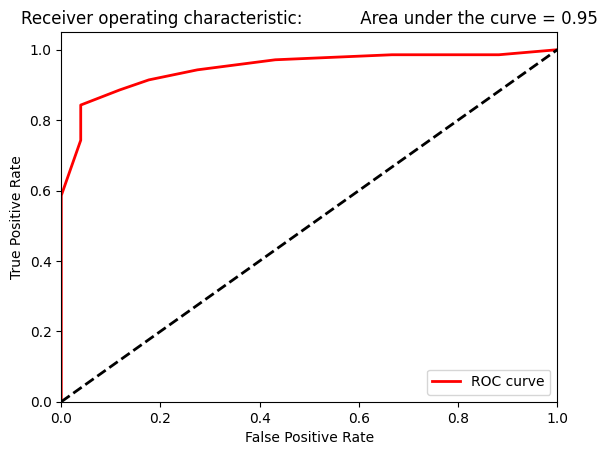

In [777]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(
          areaUnderROC))
plt.legend(loc="lower right")
plt.show()

Cuando tenemos nuestra grafica ROC en 0.95 podemos entonces decir que cuan bueno es el modelo para capturar los autos riesgosos, permaneciendo el riesgo de un falso positivo lo mas bajo posible. Quiza sea esto mas util cuando evaluames este paremtro contra XGBoost. 

In [778]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm= metrics.confusion_matrix(y_test, y_pred)
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  0.95
Kappa    :  0.898876404494382


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Los valores de exactitud superan los de KNN antes dispuesto ademas de tener un menor riesgo de overfitting. 

In [779]:
importances = model.feature_importances_
importances

array([0.14092533, 0.19729722, 0.17529926, 0.09800377, 0.00377757,
       0.00886779, 0.        , 0.11451558, 0.00542106, 0.00128379,
       0.01784692, 0.02284279, 0.02303663, 0.01212775, 0.01436269,
       0.03076824, 0.00172922, 0.00329721, 0.01941285, 0.01842517,
       0.00769496, 0.01545571, 0.02905214, 0.01080284, 0.        ,
       0.01939207, 0.00836142, 0.        ])

Ahora nos gustaría conocer las variables que el modelo consideró más importantes. Esto puede ser de gran utilidad para tomar decisiones en futuros modelos y también para determinar qué variables son relevantes en el proceso de clusterización. Al identificar las variables más influyentes, podemos obtener información valiosa sobre los factores clave que afectan la clasificación o agrupación de los datos. Esto nos permitirá comprender mejor el problema y tomar decisiones más fundamentadas en el futuro.

In [780]:
# Obtener las importancias de las características
importances = model.feature_importances_

# Crear un DataFrame para mostrar las importancias de las características
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Ordenar las características por su importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Imprimir las importancias de las características
print(feature_importances)

                   Feature  Importance
1               wheel-base    0.197297
2                   height    0.175299
0             num-of-doors    0.140925
7                 peak-rpm    0.114516
3                   length    0.098004
15        drive-wheels_rwd    0.030768
22        fuel-system_2bbl    0.029052
12        body-style_wagon    0.023037
11        body-style_sedan    0.022843
18         engine-type_ohc    0.019413
25        fuel-system_mpfi    0.019392
19        engine-type_ohcf    0.018425
10    body-style_hatchback    0.017847
21        fuel-system_1bbl    0.015456
14        drive-wheels_fwd    0.014363
13        drive-wheels_4wd    0.012128
23         fuel-system_idi    0.010803
5              aspirantion    0.008868
26        fuel-system_spdi    0.008361
20        engine-type_ohcv    0.007695
8   body-style_convertible    0.005421
4                fuel-type    0.003778
17           engine-type_l    0.003297
16        engine-type_dohc    0.001729
9       body-style_hardto

Vemos que las variables con mayor importancia para el modelo son:
|1               wheel-base    |
|0             num-of-doors    |
|2                   height    |
|3                   length    |

In [781]:
#top_features = feature_importances['Feature'][:5]  # Obtén las 5 características más importantes (puedes cambiar el número)
#fig, axes = plt.subplots(nrows=len(top_features), figsize=(8, 12))

#for i, feature in enumerate(top_features):
#    df_unido_encoded.groupby('symboling')[feature].plot(kind='hist', ax=axes[i], alpha=0.5)
#    axes[i].legend(['No riesgoso', 'Riesgoso'])
#    axes[i].set_xlabel(feature)
#    axes[i].set_ylabel('Frequency')

#plt.tight_layout()
#plt.show()

## XGBoost

Antes de entrenar el modelo XGBoost, es necesario especificar los hiperparámetros que deseamos utilizar. Los hiperparámetros son valores que controlan el comportamiento del algoritmo y afectan el rendimiento y la capacidad de generalización del modelo.

A continuación, se muestra un ejemplo de cómo especificar los hiperparámetros para el modelo:

In [782]:
from sklearn import tree, datasets, metrics
#from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación

from xgboost import XGBClassifier
import xgboost as xgb


In [783]:
from sklearn import tree, datasets, metrics
#from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación

from xgboost import XGBClassifier
import xgboost as xgb


params_xGB = {
     'nthread': 16,  # number of cores
     'learning_rate': 0.3,  # range 0 to 1, default 0.3
     'gamma': 0,  # range 0 to infinity, default 0
     # increase to reduce complexity (increase bias, reduce variance)
     'max_depth': 6,  # range 1 to infinity, default 6
     'min_child_weight': 1,  # range 0 to infinity, default 1
     'max_delta_step': 0,  # range 0 to infinity, default 0
     'subsample': 1.0,  # range 0 to 1, default 1
     # subsample ratio of the training examples
     'colsample_bytree': 1.0,  # range 0 to 1, default 1
     # subsample ratio of features
     'objective': 'binary:logistic',
     'num_class': 1,
     'eval_metric': 'logloss',
     'seed': 123,
     'silent': 1
 }

Ya especificados nuestros hiperparametros vamos a generar nuestro entrenamiento a partir de.

In [784]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index, columns=['prediction'])

k_fold = KFold(n_splits=5, shuffle=True)

for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)

    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, nfold=5, early_stopping_rounds=200, verbose_eval=50, metrics='logloss')

    best_rounds = np.argmin(bst['test-logloss-mean'])
    bst = xgb.train(params_xGB, dtrain, best_rounds)

    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)

    dtest = xgb.DMatrix(data=X_cv_fold)
    predictions = bst.predict(dtest)
    predictionsBasedOnKFolds.loc[X_cv_fold.index, 'prediction'] = predictions
    loglossCV = log_loss(y_cv_fold, predictions)
    cvScores.append(loglossCV)

    print('Training Log Loss:', loglossTraining)
    print('CV Log Loss:', loglossCV)

loglossXGBoostGradientBoosting = log_loss(y_train, predictionsBasedOnKFolds.loc[:, 'prediction'])
print('XGBoost Gradient Boosting Log Loss:', loglossXGBoostGradientBoosting)

[20:09:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:09:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:09:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:09:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:09:56] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-logloss:0.54158+0.01364	test-logloss:0.57847+0.04306
[50]	train-logloss:0.06994+0.01031	test-logloss:0.44400+0.27815
[100]	train-logloss:0.05630+0.00644	test-logloss:0.46605+0.30402
[150]	train-logloss:0.05142+0.00516	test-logloss:0.46706+0.30045
[200]	train-logloss:0.04889+0.00472	test-logloss:0.46741+0.29941
[211]	train-logloss:0.04845+0.00466	test-logloss:0.46830+0.29948
[20:09:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Training Log Loss: 0.16062701492799925
CV Log Loss: 0.2921281132667895
[20:09:59] WARNING: ../src/learner.cc:

Dado que programamos nuestro XGBoost con cinco rounds (n_splits=5), evaluando la perdida logaritmica con cross validation y su incremento a medida que se dan nuevas iteraciones. El proceso de entrenamiento tambien se detiene cuando no hay mas mejora en el error por tanto se evita de mejor manera el overfitting. Quiza por esto los valores a continuacion son un poco mas bajos. 

Nuestro valor **final de perdida logaritmica de XGBoost es de : 0.34789292504104147**

valor muy inferior al 0.57 en Random forest y por tanto una mejora substancial en el modelo de aprendizaje. 

In [785]:
# Convert prediction probabilities to class labels
predictions = predictionsBasedOnKFolds['prediction'].apply(lambda x: 1 if x >= 0.5 else 0)

# Calculate accuracy
accuracy = accuracy_score(y_train, predictions)

# Calculate kappa
kappa = cohen_kappa_score(y_train, predictions)

print('Accuracy:', accuracy)
print('Kappa:', kappa)

Accuracy: 0.8760330578512396
Kappa: 0.7437526471833968


Text(0.5, 1.0, 'Precision-Recall curve: Average Precision = 0.95')

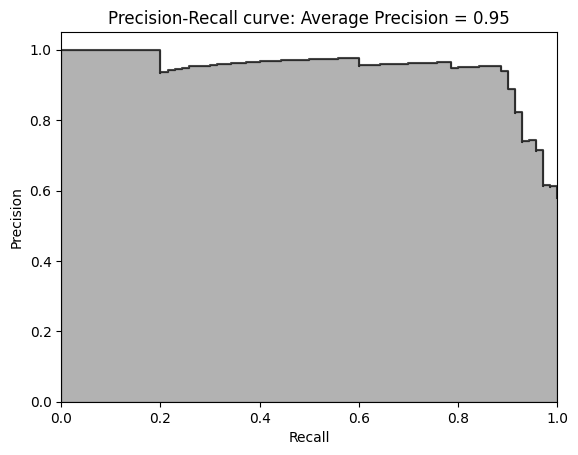

In [786]:
preds = pd.concat([y_train,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsXGBoostGradientBoosting = preds.copy()

precision, recall, thresholds = \
     precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = \
     average_precision_score(preds['trueLabel'],preds['prediction'])

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))



Nuestra precision si no cambio sigue siendo muy similar a la de Random Forest (precision= 96).

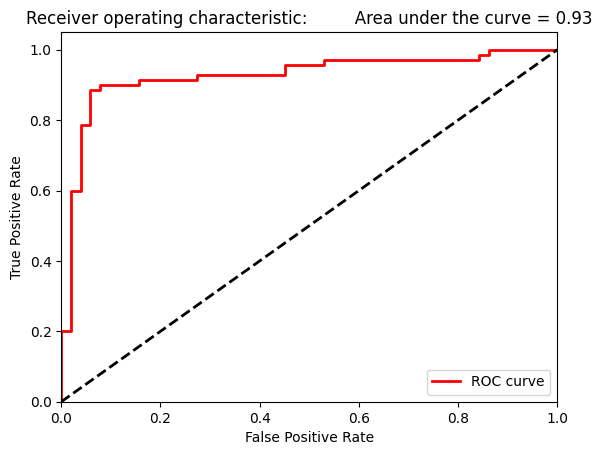

In [787]:
fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
        Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

Cuando tenemos nuestra grafica ROC en 0.93 solo un poco menor al de Random Forest podemos entonces decir cuan bueno es el modelo para capturar los autos riesgosos, permaneciendo el riesgo de un falso positivo lo mas bajo posible. 
En teoria aunque XGBoost maneja un mejor procedimiento es posible decir que para nuestros datos ambos son muy similares y por tanto quiza ambos sean viables para predecir futuros autos riesgosos. 

In [788]:
importance = bst.get_score(importance_type='weight')
feature_importances = sorted(importance.items(), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance_score in feature_importances:
    print(f"{feature}: {importance_score}")

Feature Importances:
wheel-base: 125.0
length: 59.0
peak-rpm: 57.0
height: 51.0
body-style_sedan: 28.0
fuel-system_mpfi: 23.0
num-of-doors: 22.0
drive-wheels_rwd: 10.0
aspirantion: 4.0
fuel-system_1bbl: 2.0
fuel-type: 1.0
drive-wheels_4wd: 1.0
fuel-system_2bbl: 1.0



Al comparar las variables más importantes obtenidas tanto en el modelo Random Forest como en el modelo de ganancia de información, se observa una similitud significativa:

1. wheel-base
2. num-of-doors
3. height
4. length

Esto sugiere que estas variables tienen una fuerte influencia en la predicción del riesgo de un automóvil. Por lo tanto, para nuestro análisis de segmentación, utilizaremos exclusivamente estas cuatro variables.

Es importante tener en cuenta que las otras variables, al ser categóricas y binomiales, presentan limitaciones en términos de procesamiento en técnicas como PCA y K-means. Estas técnicas funcionan mejor con variables numéricas continuas. Por lo tanto, al centrarnos en las variables antes mencionadas, podemos obtener resultados más sólidos y significativos en nuestro análisis de segmentación.

### Evaluando los dos arboles de decision final con Test Set

Podemos calcular la perdida para cada modelo comparando la probabilidad predicha de ser el auto riesgoso contra los verdaderos valores en el test.

In [789]:
predictionsTestSetRandomForests = \
    pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = \
    RFC.predict_proba(X_test)[:,1]
logLossTestSetRandomForests = \
    log_loss(y_test, predictionsTestSetRandomForests)

<ipython-input-789-cc40bc6394de>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  predictionsTestSetRandomForests.loc[:,'prediction'] = \


In [790]:
 predictionsTestSetXGBoostGradientBoosting = \
     pd.DataFrame(data=[],index=y_test.index,columns=['prediction'])
 dtest = xgb.DMatrix(data=X_test)
 predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \
     bst.predict(dtest)
 logLossTestSetXGBoostGradientBoosting = \
     log_loss(y_test, predictionsTestSetXGBoostGradientBoosting)

<ipython-input-790-a5bec9104dad>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = \


In [791]:
print("Log Loss of Random Forests on Test Set: ", \
          logLossTestSetRandomForests)
print("Log Loss of XGBoost Gradient Boosting on Test Set: ", \
           logLossTestSetXGBoostGradientBoosting)

Log Loss of Random Forests on Test Set:  0.2465453206632595
Log Loss of XGBoost Gradient Boosting on Test Set:  0.414823763792262


**Vemos que el valor menor lo posee Random Forest. Sorepresivamente esto nos indica que este modelo podria ser mejor predictor para nuestro tipo de datos que XGBoost**

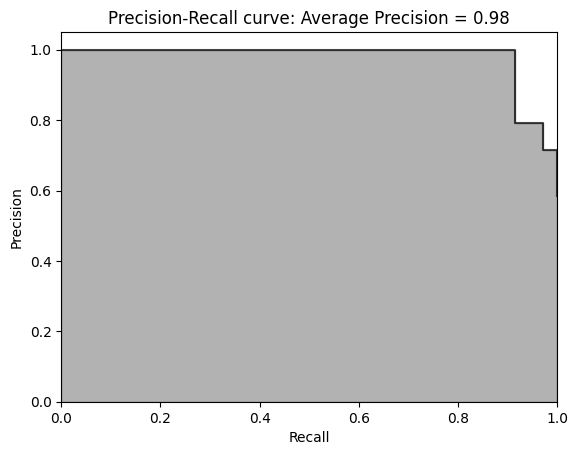

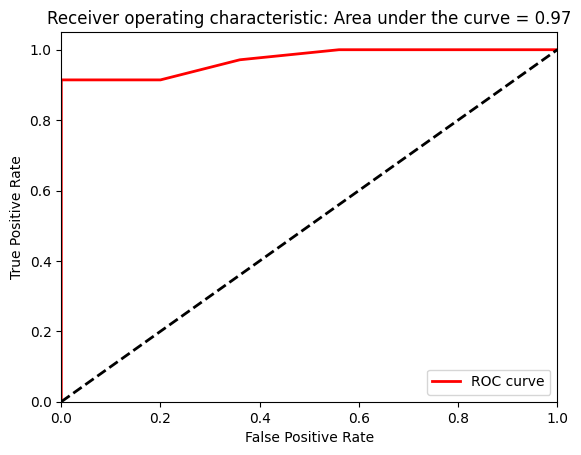

In [792]:
precision, recall, thresholds = \
    precision_recall_curve(y_test,predictionsTestSetRandomForests)
average_precision = \
    average_precision_score(y_test,predictionsTestSetRandomForests)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(y_test,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

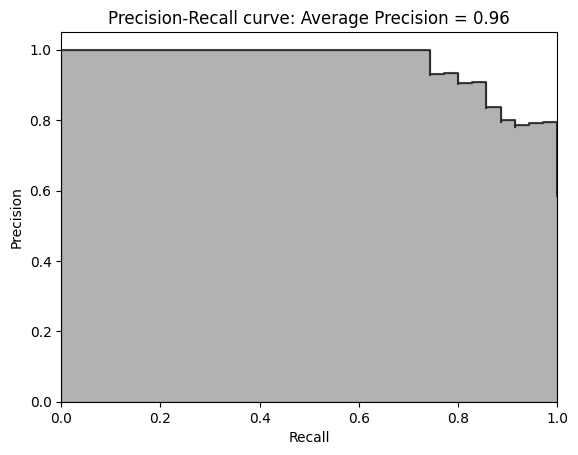

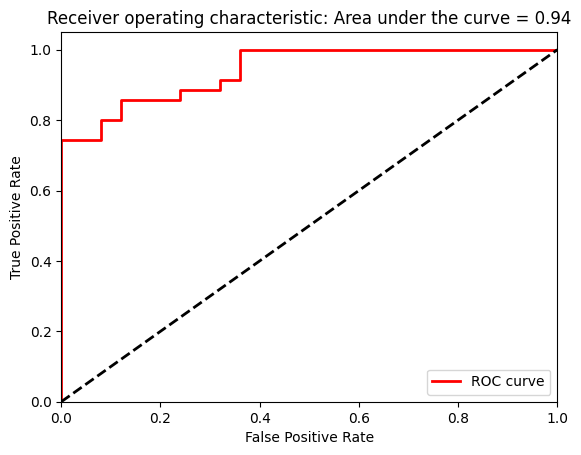

In [793]:
 precision, recall, thresholds = \
     precision_recall_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
 average_precision = \
     average_precision_score(y_test,predictionsTestSetXGBoostGradientBoosting)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
           average_precision))

fpr, tpr, thresholds = \
     roc_curve(y_test,predictionsTestSetXGBoostGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
 Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# PCA

In [794]:
import math
from collections import Counter


from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabasz_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

solo vamos a usar valores X o independientes  
('symboling', 'wheel-base', 'height', 'length', 'num-of-doors')

In [795]:
df_tree = df_unido_encoded.copy()
df_tree['symboling'] = df_unido_encoded['symboling'].map({'no riesgoso': 0, 'riesgoso': 1})
df_tree = df_tree[['symboling', 'wheel-base', 'height', 'length', 'num-of-doors']]


dataX = df_tree.drop("symboling", axis=1)  # características
dataY = df_tree["symboling"]  # variable objetivo

In [796]:
dataX

,wheel-base,height,length,num-of-doors
0,88.6,48.8,168.8,2.0
1,88.6,48.8,168.8,2.0
2,94.5,52.4,171.2,2.0
3,99.8,54.3,176.6,4.0
4,99.4,54.3,176.6,4.0
...,...,...,...,...
188,97.3,55.7,171.7,4.0
189,94.5,55.6,159.3,2.0
190,94.5,51.4,165.7,2.0
191,100.4,55.1,180.2,4.0


In [797]:
dataStd = pd.DataFrame(preprocessing.scale(dataX))
dataStd.columns = dataX.columns

In [798]:
print(dataStd)

     wheel-base    height    length  num-of-doors
0     -1.640375 -2.065814 -0.374009     -1.111111
1     -1.640375 -2.065814 -0.374009     -1.111111
2     -0.658449 -0.554039 -0.178803     -1.111111
3      0.223621  0.243842  0.260408      0.900000
4      0.157049  0.243842  0.260408      0.900000
..          ...       ...       ...           ...
176   -0.192450  0.831755 -0.138136      0.900000
177   -0.658449  0.789761 -1.146696     -1.111111
178   -0.658449 -0.973977 -0.626149     -1.111111
179    0.323478  0.579792  0.553216      0.900000
180    0.323478  0.579792  0.553216      0.900000

[181 rows x 4 columns]


In [799]:
pca = PCA()
pca.fit(dataStd.iloc[:, 0:4])

PCA()

In [800]:
pca.components_

array([[ 0.56388245,  0.47780574,  0.53262413,  0.41237095],
       [ 0.36531185, -0.35883972,  0.48435513, -0.70935281],
       [ 0.04284984, -0.78927557,  0.22010756,  0.5716298 ],
       [-0.73942392,  0.14134995,  0.65822816, -0.00285628]])

explainedvariance: la varianza explicada por cada eje en las unidades originales

In [801]:
pca.explained_variance_

array([2.62500011, 0.79719662, 0.48365475, 0.11637073])

In [802]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

array([0.65262434, 0.19819806, 0.12024566, 0.02893195])

In [803]:
dataPca = pca.transform(dataStd.iloc[:, 0:4])

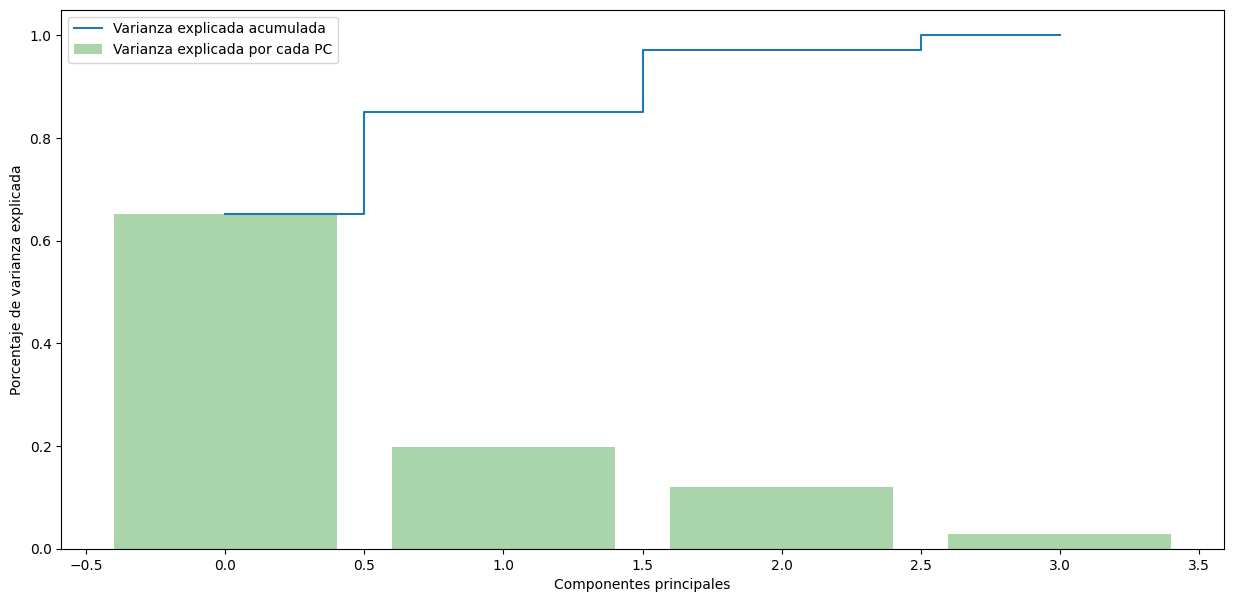

In [804]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [807]:
np.sum(pca.explained_variance_ratio_[0:3])

0.9710680504233158

In [ ]:
dataPca = dataPca[:,0:3]

In [ ]:
dataPca[0:4]

array([[-2.56943271,  0.74906451,  0.84274062],
       [-2.56943271,  0.74906451,  0.84274062],
       [-1.18943575,  0.65983756, -0.26542505],
       [ 0.75243865, -0.51809634,  0.38890812]])

In [ ]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(15, 7))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1))
    plt.ylabel("PC{}".format(index2))
    plt.grid()

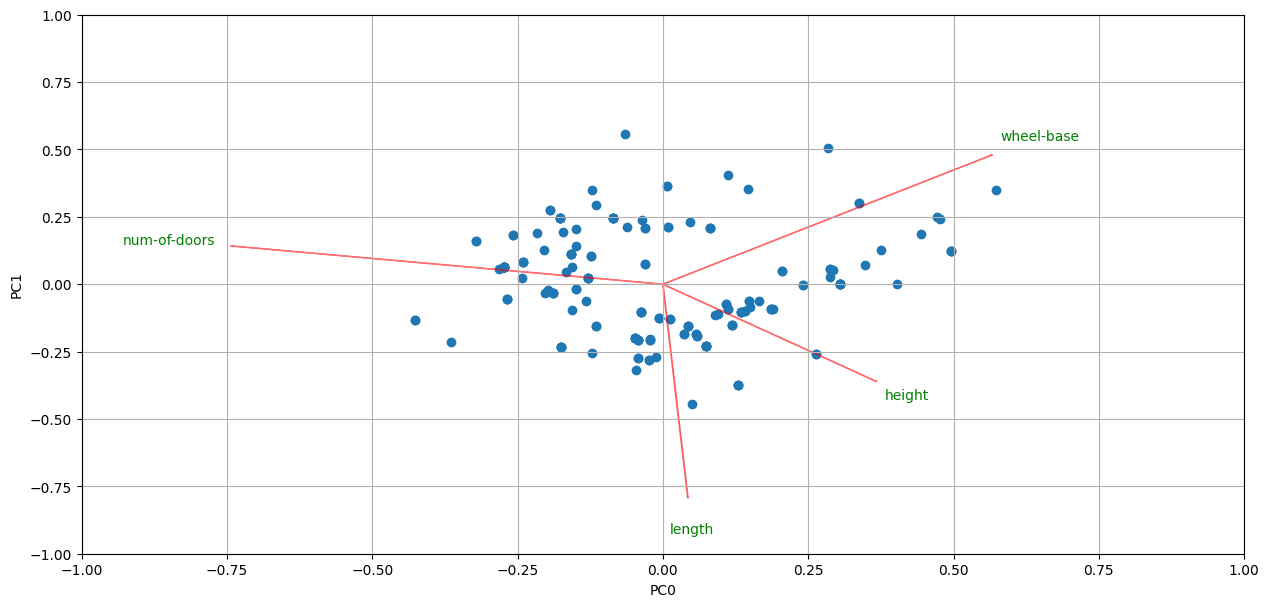

In [ ]:
biplot(dataPca, pca.components_, 0, 1, ['wheel-base', 'height', 'length', 'num-of-doors'])

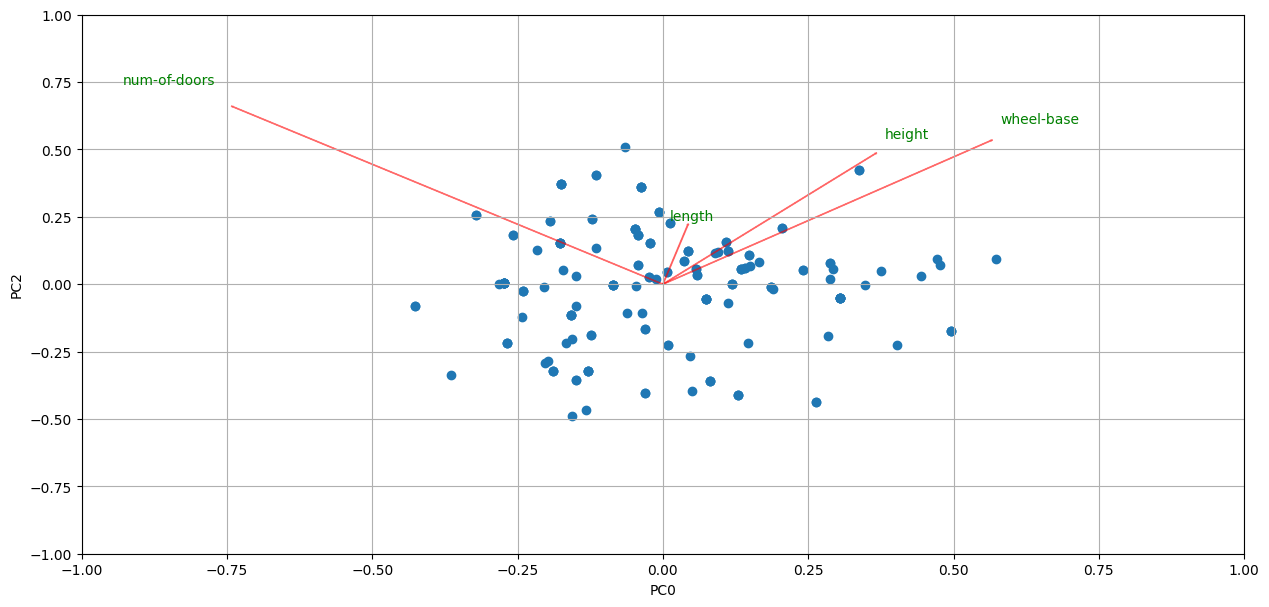

In [ ]:
biplot(dataPca, pca.components_, 0, 2, ['wheel-base', 'height', 'length', 'num-of-doors'])

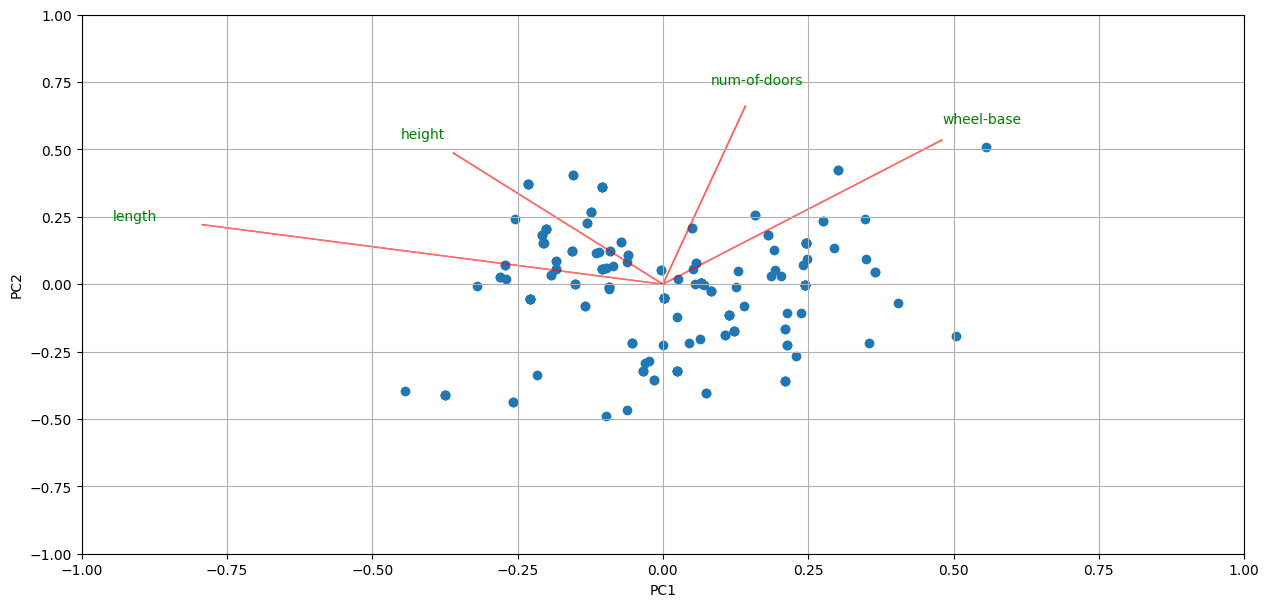

In [ ]:
biplot(dataPca, pca.components_, 1, 2, ['wheel-base', 'height', 'length', 'num-of-doors'])

In [ ]:
pca.components_


array([[ 0.56388245,  0.47780574,  0.53262413,  0.41237095],
       [ 0.36531185, -0.35883972,  0.48435513, -0.70935281],
       [ 0.04284984, -0.78927557,  0.22010756,  0.5716298 ],
       [-0.73942392,  0.14134995,  0.65822816, -0.00285628]])

In [ ]:
dataPca = pd.DataFrame(dataPca)
dataPca.columns=['PC0', 'PC1', 'PC2']

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataPca)
clusters = kmeans.labels_

In [ ]:
dataPca['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({1: 75, 0: 68, 2: 38})


In [ ]:
var_num = ['wheel-base', 'height', 'length', 'num-of-doors']

<ipython-input-336-0193f3b081b0>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataPca.loc[dataPca.Cluster==0][var], shade=True, color='r', ax=ax);
<ipython-input-336-0193f3b081b0>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataPca.loc[dataPca.Cluster==1][var], shade=True, color='b', ax=ax);
<ipython-input-336-0193f3b081b0>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataPca.loc[dataPca.Cluster==2][var], shade=True, color='g', ax=ax);
<ipython-input-336-0193f3b081b0>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please up

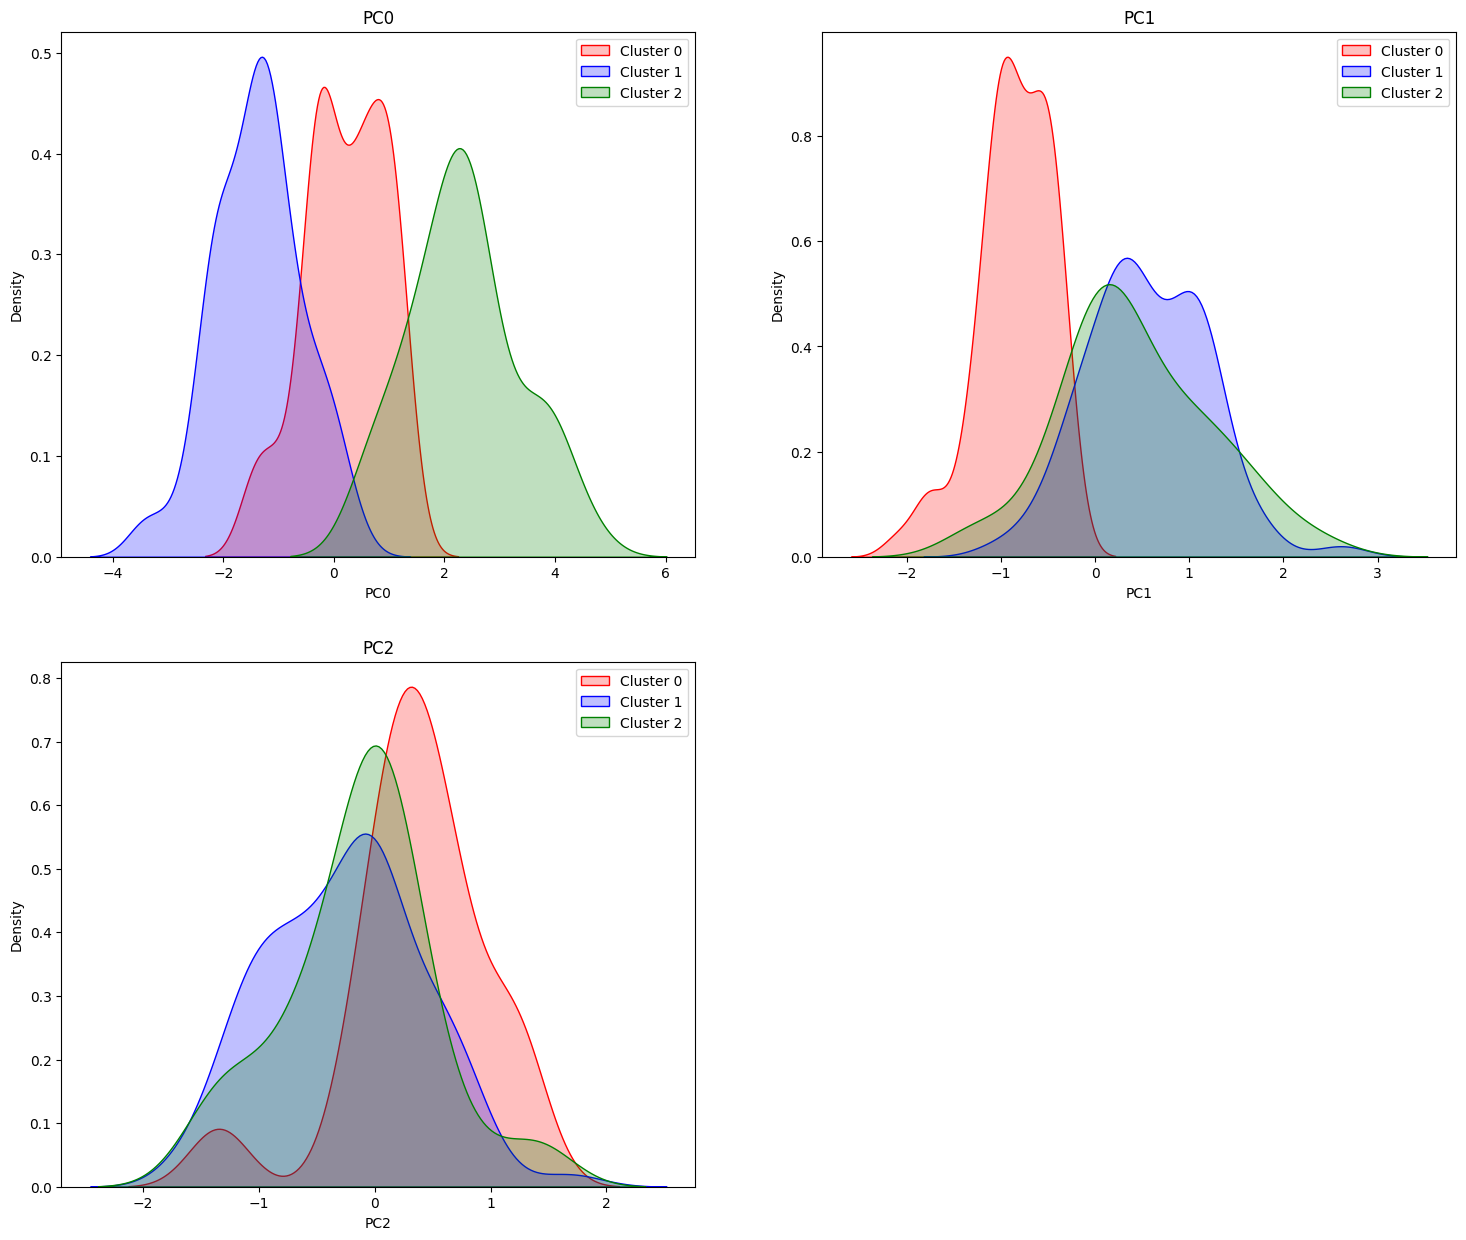

In [ ]:
fig = plt.figure(figsize=(18,15))
i=1
for var in dataPca.columns[0:3]:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataPca.loc[dataPca.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(dataPca.loc[dataPca.Cluster==2][var], shade=True, color='g', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

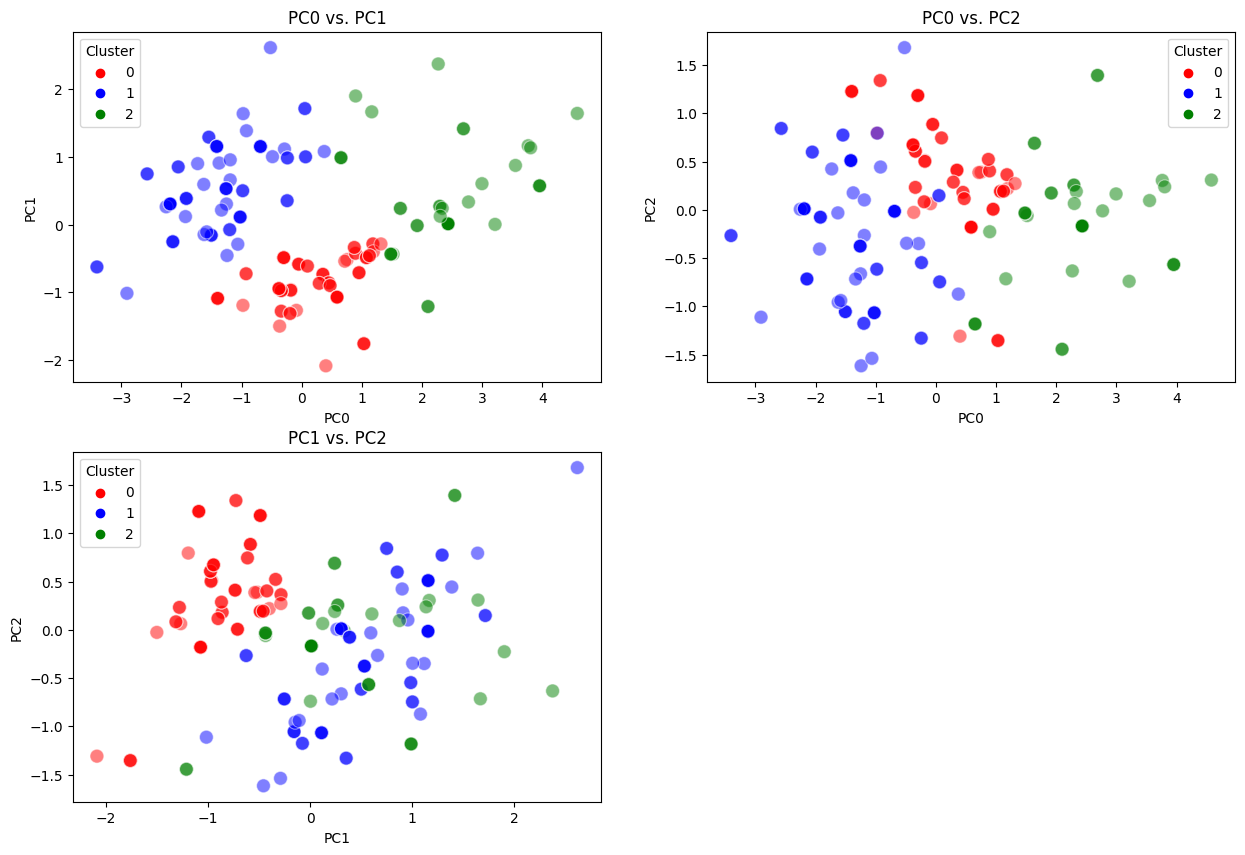

In [ ]:
fig = plt.figure(figsize=(15,10))
colorPalette = ["r", "b", "g"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="PC0", y="PC1", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC0 vs. PC1")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="PC0", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC0 vs. PC2")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=dataPca, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("PC1 vs. PC2")
plt.show()

### KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(dataStd.iloc[:,0:4])

KMeans(n_clusters=3, n_init=10, random_state=0)

In [ ]:
print("Le tomó a KMeans", kmeans.n_iter_, "iteraciones llegar a convergencia, con un WSS final de:",
      kmeans.inertia_, "y los centroides siguientes:", kmeans.cluster_centers_)

Le tomó a KMeans 5 iteraciones llegar a convergencia, con un WSS final de: 274.38617436973016 y los centroides siguientes: [[-0.20493198  0.12033115 -0.20404125  0.9       ]
 [-0.56014526 -0.65482416 -0.54188505 -1.11111111]
 [ 1.47227024  1.07708669  1.43463642  0.58245614]]


In [ ]:
#kmeans.labels_

In [ ]:
clusters = kmeans.predict(dataStd.iloc[:, 0:4])
clusters

array([1, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0], dtype=int32)

In [ ]:
counter=Counter(clusters)
print(counter)

Counter({1: 75, 0: 68, 2: 38})


In [ ]:
dataStd.loc[:,'Cluster'] = clusters

In [ ]:
dataStd.columns

Index(['wheel-base', 'height', 'length', 'num-of-doors', 'Cluster'], dtype='object')

In [ ]:
dataStd[0:5]

,wheel-base,height,length,num-of-doors,Cluster
0,-1.640375,-2.065814,-0.374009,-1.111111,1
1,-1.640375,-2.065814,-0.374009,-1.111111,1
2,-0.658449,-0.554039,-0.178803,-1.111111,1
3,0.223621,0.243842,0.260408,0.900000,0
4,0.157049,0.243842,0.260408,0.900000,0


<ipython-input-351-e980b95c13da>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
<ipython-input-351-e980b95c13da>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
<ipython-input-351-e980b95c13da>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
<ipython-input-351-e980b95c13da>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please up

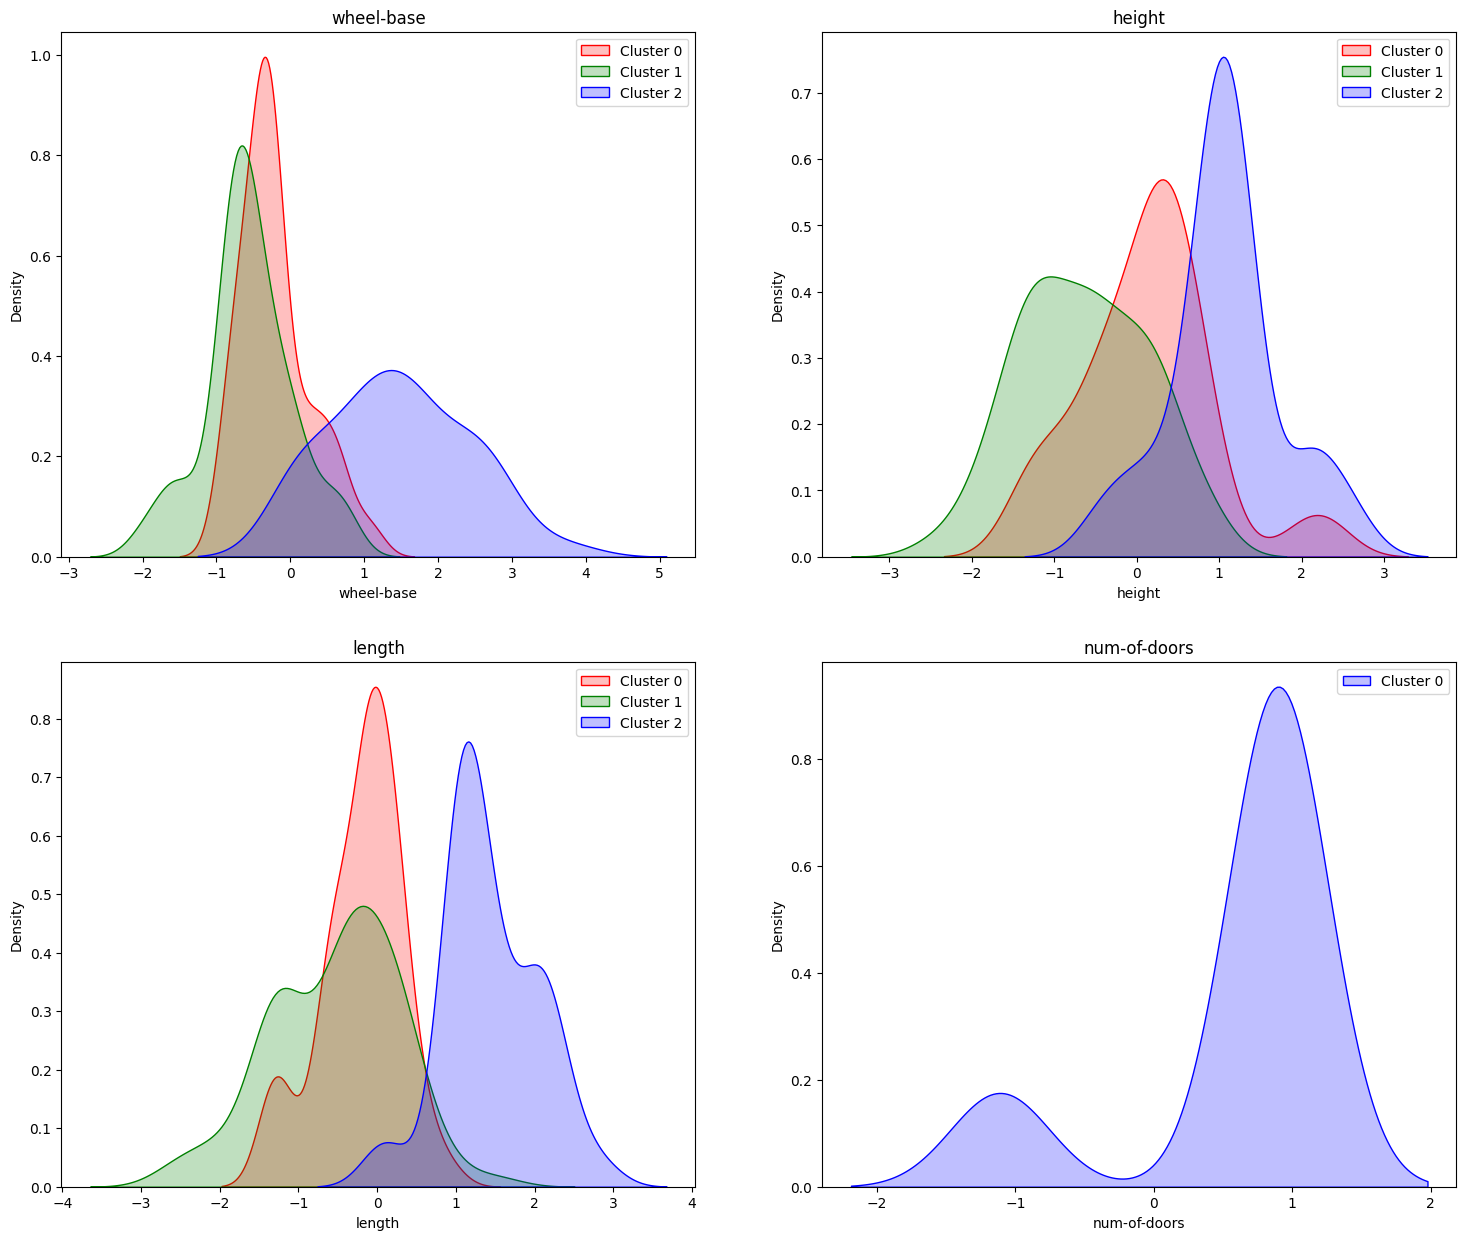

In [ ]:
fig = plt.figure(figsize=(18,15))
i=1
for var in var_num:
    ax = fig.add_subplot(math.ceil(len(var_num)/2), 2, i)
    sns.kdeplot(dataStd.loc[dataStd.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==1][var], shade=True, color='g', ax=ax);
    sns.kdeplot(dataStd.loc[dataStd.Cluster==2][var], shade=True, color='b', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

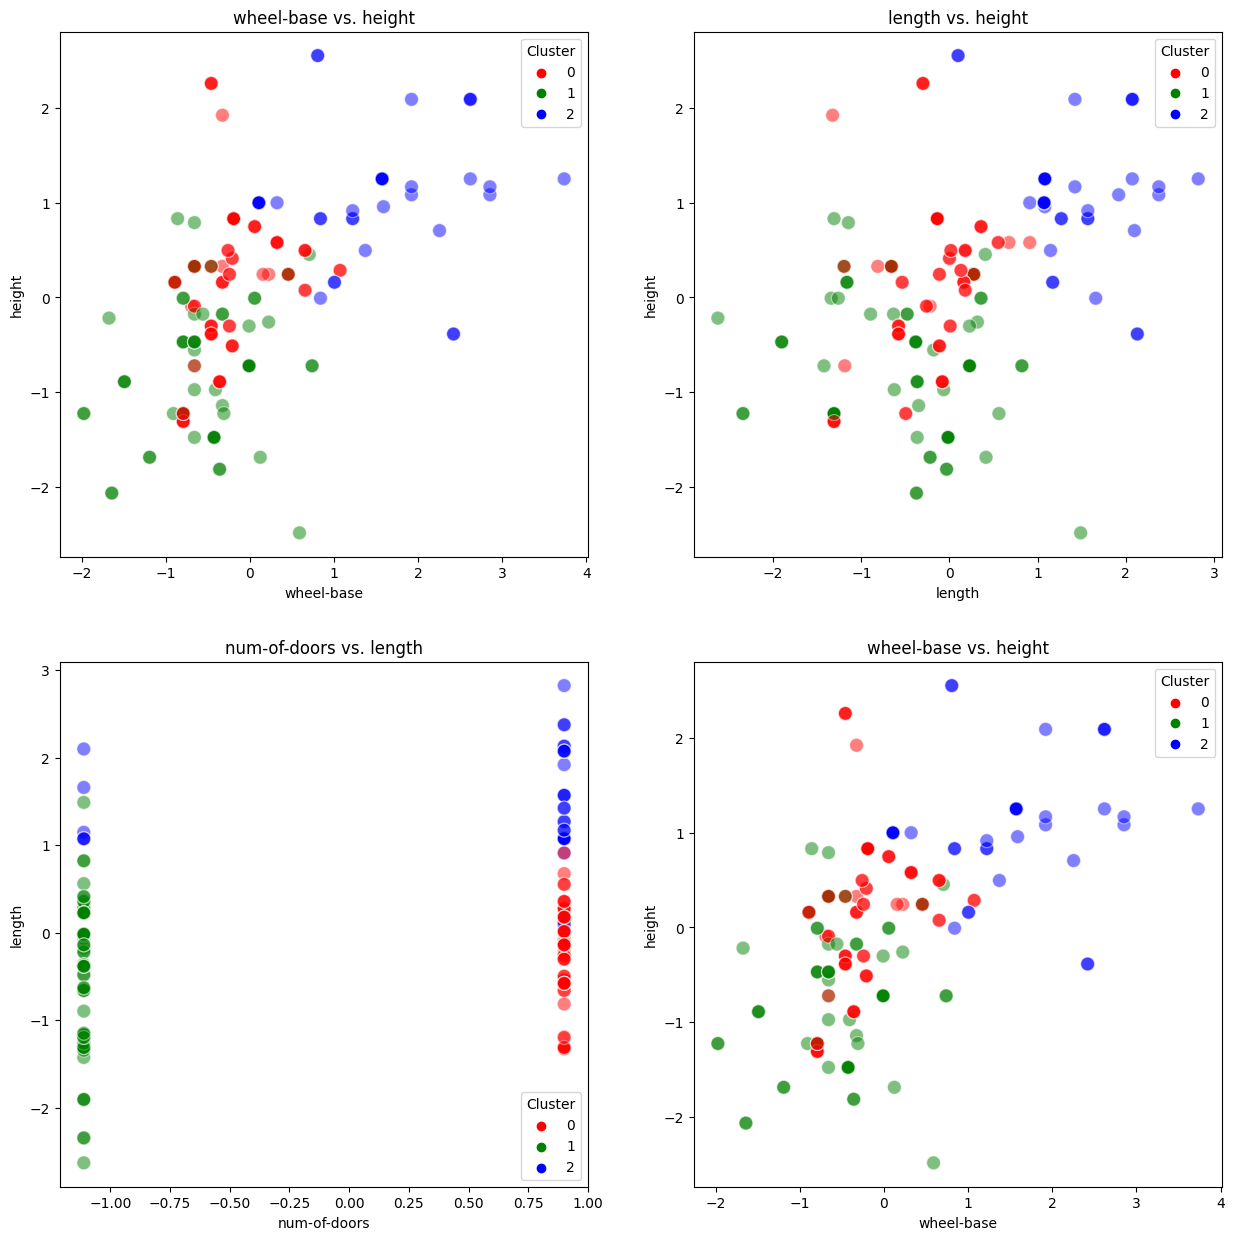

In [ ]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "g", "b"]
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(x="wheel-base", y="height", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("wheel-base vs. height")
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(x="length", y="height", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("length vs. height")
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(x="num-of-doors", y="length", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("num-of-doors vs. length")
ax = fig.add_subplot(2, 2, 4)
sns.scatterplot(x="wheel-base", y="height", hue="Cluster", data=dataStd, ax=ax, palette=colorPalette, s=100, alpha=0.5)
plt.title("wheel-base vs. height")
plt.show()


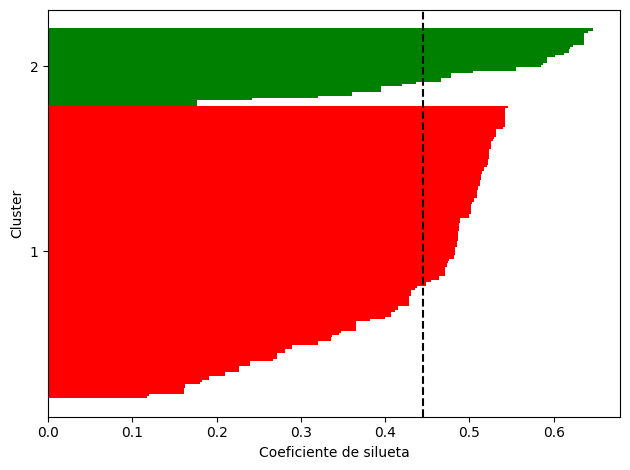

In [ ]:
k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

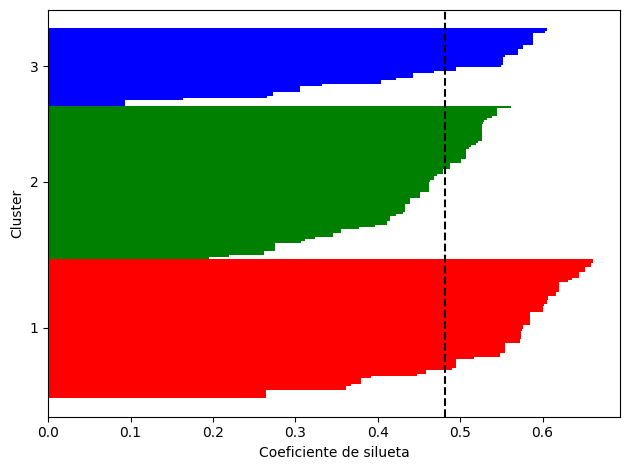

In [ ]:
k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

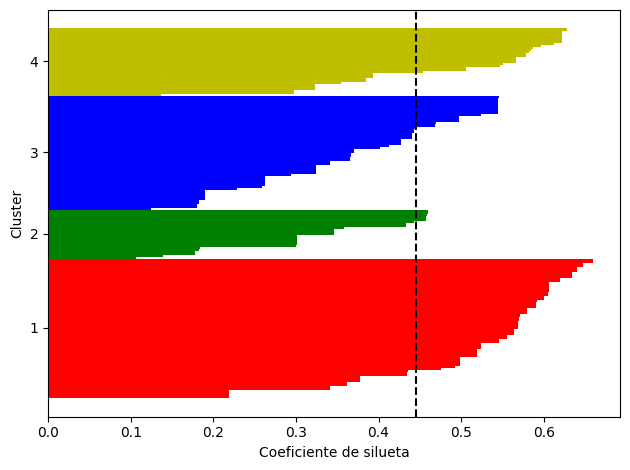

In [ ]:
k=4
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(dataStd)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataStd, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()